# Assignment 29

In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.



In [2]:
from bs4 import BeautifulSoup
import urllib.request
import nltk

import re
from collections import Counter
from nltk.corpus import stopwords


In [3]:
import re
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

### Extracting words from text

In [8]:
text = soup.get_text()

Show all words

In [9]:
print(text)



  
   

  PHP: Hypertext Preprocessor

 
 
 
 

 
 
 









 

 

 

 

 





  
    
    
    
    
      Downloads
      Documentation
      Get Involved
      Help
    
    
      
      
    
  
  


Getting Started
	Introduction
	A simple tutorial
Language Reference
	Basic syntax
	Types
	Variables
	Constants
	Expressions
	Operators
	Control Structures
	Functions
	Classes and Objects
	Namespaces
	Errors
	Exceptions
	Generators
	References Explained
	Predefined Variables
	Predefined Exceptions
	Predefined Interfaces and Classes
	Context options and parameters
	Supported Protocols and Wrappers


Security
	Introduction
	General considerations
	Installed as CGI binary
	Installed as an Apache module
	Session Security
	Filesystem Security
	Database Security
	Error Reporting
	Using Register Globals
	User Submitted Data
	Magic Quotes
	Hiding PHP
	Keeping Current
Features
	HTTP authentication with PHP
	Cookies
	Sessions
	Dealing with XForms
	Handling file uploads
	Using remote files
	

In [10]:
# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:5]

['PHP', 'Hypertext', 'Preprocessor', 'Downloads', 'Documentation']

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Richa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
sw = nltk.corpus.stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# Lowercase all words 
words = [word.lower() for word in tokens]

In [15]:
words[:15]

['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'a',
 'simple',
 'tutorial',
 'language']

In [17]:
# Removing stopwords
words = [word for word in words if word not in sw]

In [18]:
print(len(words))

2152


In [19]:
# Removing numbers
words = [word for word in words if not word.isnumeric()]

In [20]:
print(len(words))

1819


In [21]:
# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

In [22]:
print(len(words))

1807


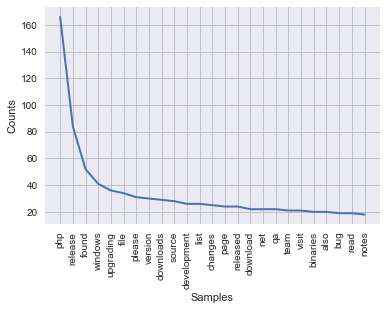

In [23]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words)
freqdist1.plot(25)

In [33]:
#freqdist1.most_common()
for word, count in freqdist1.most_common():
    print(u'{}:{}'.format(word, count))

php:166
release:84
found:52
windows:41
upgrading:36
file:34
please:31
version:30
downloads:29
source:28
development:26
list:26
changes:25
page:24
released:24
download:22
net:22
qa:22
team:21
visit:21
binaries:20
also:20
bug:19
read:19
notes:18
extensions:16
features:15
files:15
archive:15
system:15
next:15
test:15
news:15
alpha:15
wiki:14
carefully:14
report:14
use:14
production:14
information:14
new:14
complete:14
planned:14
thank:14
helping:14
us:14
make:14
better:14
candidate:14
sources:13
preview:13
announces:12
immediate:12
availability:12
users:12
encouraged:12
security:11
reporting:10
glad:9
announce:9
rough:9
outline:9
cycle:9
specified:9
issues:9
would:9
signatures:9
manifest:9
site:9
beta:9
sep:7
upgrade:7
recorded:7
changelog:7
aug:7
bugs:5
incompatibilities:5
tracking:5
full:5
releases:5
related:4
internal:4
listed:4
internals:4
august:4
first:4
language:3
predefined:3
database:3
services:3
processing:3
search:3
0rc2:3
october:3
one:3
fixed:3
0rc1:3
september:3
fixes:3
bugf

We can see the frequency of words in the webpage above